### **Importing the libraries required for this project.**


In [538]:
# The Pandas library will be used for preprocessing and organizing text data into a data frame for further analysis.

import pandas as pd

In [539]:
# Numpy will be used for performing numerical computations on textual data converted into numerical vectors.

import numpy as np

In [540]:
# The string library will be used for string manipulation.

import string

In [541]:
# The re (regular expression) library will be used for pattern matching in strings.

import re

In [ ]:
# NLTK provides tools and algorithms for preprocessing, feature extraction, and sentiment classification of text data.

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')

In [543]:
# The TextBlob library will be used with the re library to preprocess text data and classify the sentiment of the text.

from textblob import TextBlob

In [544]:
# The collections library provides tools to count and store occurrences of words and phrases.

from collections import Counter

In [545]:
# Wordcloud will be used to create word clouds from text data.

from wordcloud import WordCloud

In [546]:
# Matplotlib will be used for data visualisation. 

import matplotlib.pyplot as plt


In [547]:
# Seaborn will be used for data visualisation. 

import seaborn as sns




---



### **Reading in the data**

In [548]:
df = pd.read_csv("/content/drive/MyDrive/Colab/4 Chat GPT Sentiment/dataset/chatgpt_tweets.csv")



---



### **Exploring the data**

In [549]:
# Viewing the first five rows of the dataset for a brief overview of the structure and composition of the DataFrame. 

df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN


<p>

In [550]:
# Identifying the types of data in each column. 

df.dtypes

tweet_id          int64
created_at       object
like_count        int64
quote_count       int64
reply_count       int64
retweet_count     int64
tweet            object
country          object
photo_url        object
city             object
country_code     object
dtype: object

<p>

In [551]:
# A summary of the dataframe, including the number of non-null values and the data type of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tweet_id       219294 non-null  int64 
 1   created_at     219294 non-null  object
 2   like_count     219294 non-null  int64 
 3   quote_count    219294 non-null  int64 
 4   reply_count    219294 non-null  int64 
 5   retweet_count  219294 non-null  int64 
 6   tweet          219294 non-null  object
 7   country        3648 non-null    object
 8   photo_url      68446 non-null   object
 9   city           3648 non-null    object
 10  country_code   3645 non-null    object
dtypes: int64(5), object(6)
memory usage: 18.4+ MB


<p>

In [552]:
# Calculating the percentage of missing values in each column, and printing the column name and percentage of missing values in that column.

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

tweet_id - 0.0%
created_at - 0.0%
like_count - 0.0%
quote_count - 0.0%
reply_count - 0.0%
retweet_count - 0.0%
tweet - 0.0%
country - 0.9833647979424882%
photo_url - 0.6878801973606209%
city - 0.9833647979424882%
country_code - 0.9833784782073381%


<p>



In [553]:
# Returns the sum of missing values in each column of the dataframe.

df.isnull().sum()


tweet_id              0
created_at            0
like_count            0
quote_count           0
reply_count           0
retweet_count         0
tweet                 0
country          215646
photo_url        150848
city             215646
country_code     215649
dtype: int64



---



### **Data manipulation**

In [554]:
# Making a copy of the dataframe for further exploration and data manipulation. 

df_new=df.copy()

<p>



In [555]:
# Dropping the columns 'country', 'photo_url', 'city', and 'country_code' from the dataframe using the drop() method.

df_new = df.drop(['country', 'photo_url', 'city', 'country_code'], axis=1)


<p>

In [556]:
df_new.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh..."
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ..."
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne..."


<p>



In [557]:
# Calculating the number of words in each tweet and adding a new column for 'word count' to the dataframe.

def number_of_words(df_new):
    df_new['word_count'] = df_new['tweet'].apply(lambda x : len(str(x).split(" ")))

<p>



In [558]:
# Calculating the total number of characters in each tweet (excluding spaces, punctuation marks, and other special characters).

def char_count(text):
    charc = 0
    for char in text:
        if char != " ":
            charc += 1
    return charc

<p>



In [559]:
# Adding a new column 'stopwords_count' to the data frame that counts the number of stop words in each row of the 'tweet' column.

stop_words = stopwords.words('english')
def num_of_stopwords(df_new):
    df_new['stopwords_count'] = df_new['tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

<p>



In [560]:
# Adding a new column 'hashtag_count' to the data frame that counts the number of hashtags in each row of the 'tweet' column.

def num_of_hashtags(df_new):
    df_new['hashtag_count'] = df_new['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
  

<p>



In [561]:
# Defining a function 'feat_extract' that adds four new columns to the data frame using the functions 'num_of_hashtags', 'number_of_words', 'char_count', and 'num_of_stopwords'.

def feat_extract(df_new):
    num_of_hashtags(df_new)
    number_of_words(df_new)
    df_new['char_count']=df_new['tweet'].apply(char_count)
    num_of_stopwords(df_new)



---



### **Text preprocessing**

In [562]:
# Defining a function called 'remove_emoji' that takes a string as input and uses a regular expression to remove any Unicode characters that match specific ranges. 

def remove_emoji(string):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F1E0-\U0001F1FF"  # Regional Indicator Symbols
                           u"\U00002702-\U000027B0"  # Miscellaneous Symbols and Arrows
                           u"\U000024C2-\U0001F251"  # Enclosed Characters
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string) 

<p>



In [563]:
# Defining a function called 'remove_apostrophe' function which uses a regular expression to remove apostrophes from a string. 

def remove_apostrophe(string):
    apostrophe_pattern = re.compile(r"[’‘]")  # Matches apostrophes
    return apostrophe_pattern.sub('', string)

<p>



In [564]:
# The 'hyperlinks' function removes hyperlinks and various HTML tags from a string.

def hyperlinks(text):
    temp = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.',text)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('&gt;', "", temp) 
    temp = re.sub('&#x27;', "'", temp) 
    temp = re.sub('&#x2F;', ' ', temp)
    temp = re.sub('<p>', ' ', temp) 
    temp = re.sub('<i>', ' ', temp)
    temp = re.sub('</i>', '', temp) 
    temp = re.sub('&#62;', '', temp)
    temp = re.sub("\n", '', temp)
    return temp

<p>



In [565]:
# This 'clean_tweet' function takes a tweet text as input and performs several cleaning tasks to preprocess the text.

def clean_tweet(tweet):
    temp=tweet.lower() # Converts the tweet text to lowercase.
    temp = re.sub("'", "", temp) # Avoids removing contractions in English.
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # Removes apostrophes and mentions (e.g., "@username").
    temp = re.sub("chatgpt","",temp) # Removes the word "chatgpt".
    temp = re.sub(r'http\S+', '', temp) # Removes hyperlinks.
    temp = re.sub('[()!?]', ' ', temp) # Replaces all parentheses, exclamation marks, and question marks with a space.
    temp = re.sub('\[.*?\]',' ', temp) # Removes square brackets (i.e., removes text that is inside square brackets).
    punc=string.punctuation # Removes punctuation marks. 
    temp=temp.translate(str.maketrans('','',punc)) #Removes all the punctuation marks from the given string 'temp'.
    
    #Removing stopwords.
    new_list=[]
    words=word_tokenize(temp)
    sws=stopwords.words('english')
    for word in words:
        if word not in sws:
            new_list.append(word)
    
    temp=' '.join(new_list)
    return temp

<p>



In [566]:
# Using the TextBlob library to correct any spelling errors in the dataset.

def spell_correct(df2):
    df2['tweet'].apply(lambda x: str(TextBlob(x).correct()))



---



### **Lemmatization**

In [567]:
# This 'lemmatize' function tokenizes the text and lemmatizes each word using the WordNetLemmatizer from the nltk library, and then joins the resulting list of lemmatized words back into a string.

def lemmatize(text):    
    new_list=[]
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    for word in words:
        new_list.append(lemma.lemmatize(word))
    
    return ' '.join(new_list)

<p>

In [568]:
#Applying the previously defined functions to the dataframe to remove hyperlinks, emojis, apostrophes, lemmatize the text and perform additional text cleaning.

feat_extract(df_new)

df_new['tweet'] = df_new['tweet'].apply(hyperlinks)
df_new['tweet'] = df_new['tweet'].apply(remove_emoji)
df_new['tweet'] = df_new['tweet'].apply(remove_apostrophe)
df_new['tweet'] = df_new['tweet'].apply(clean_tweet)
df_new['final_tweet'] = df_new['tweet'].apply(lemmatize)

<p>



In [569]:
df_new.head()


,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,optimizing language models dialogue,0,8,73,1,optimizing language model dialogue
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,try talking new ai system optimized dialogue f...,0,21,119,6,try talking new ai system optimized dialogue f...
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,optimizing language models dialogue ai machine...,4,26,239,3,optimizing language model dialogue ai machinel...
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,thrilled share new model optimized dialog publ...,0,22,167,8,thrilled share new model optimized dialog publ...
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,2 minutes ago released new nnand use right,0,20,120,6,2 minute ago released new nnand use right




---



### **Top 5 most-engaged tweets**

In [570]:
top_tweets_df = df_new.sort_values(by='like_count', ascending=False)
top_tweets_df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet
77988,1600712751550431232,2022-12-08 04:43:54+00:00,119321,580,793,7051,time took reach 1 million usersnnnetflix 35 ye...,0,25,137,2,time took reach 1 million usersnnnetflix 35 ye...
3139,1598360883474108417,2022-12-01 16:58:25+00:00,82610,460,4921,6075,lot people stuck damnthatscrazy loop,0,10,48,3,lot people stuck damnthatscrazy loop
18749,1599082185402642432,2022-12-03 16:44:37+00:00,62133,1228,497,6789,pov youre senior data engineer twitter elon as...,0,22,142,6,pov youre senior data engineer twitter elon as...
35638,1599668808285028353,2022-12-05 07:35:38+00:00,52878,575,1123,3462,launched wednesday today crossed 1 million users,0,10,55,2,launched wednesday today crossed 1 million user
82417,1600854935515844610,2022-12-08 14:08:53+00:00,49891,1053,1056,10564,crossed 1m users 5 days nnto compare took netf...,0,45,211,12,crossed 1m user 5 day nnto compare took netfli...




---



### **Sentiment Analysis**

In [571]:
# Initialises an instance of the SentimentIntensityAnalyzer class from the NLTK library.

sid=SentimentIntensityAnalyzer()

<p>



In [572]:
#Using the SentimentIntensityAnalyzer from the NLTK library to calculate the compound polarity score, neutrality score, negativity score, and positivity score for each tweet in the 'final_tweet' column.

df_new['sentiment_compound_polarity']=df_new.final_tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
df_new['sentiment_neutral']=df_new.final_tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
df_new['sentiment_negative']=df_new.final_tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
df_new['sentiment_pos']=df_new.final_tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
df_new['sentiment_type']=''

df_new.loc[df_new.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df_new.loc[df_new.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df_new.loc[df_new.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df_new.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,optimizing language models dialogue,0,8,73,1,optimizing language model dialogue,0.4588,0.500,0.0,0.500,POSITIVE
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,try talking new ai system optimized dialogue f...,0,21,119,6,try talking new ai system optimized dialogue f...,0.8225,0.449,0.0,0.551,POSITIVE
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,optimizing language models dialogue ai machine...,4,26,239,3,optimizing language model dialogue ai machinel...,0.4588,0.857,0.0,0.143,POSITIVE
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,thrilled share new model optimized dialog publ...,0,22,167,8,thrilled share new model optimized dialog publ...,0.8860,0.345,0.0,0.655,POSITIVE
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,2 minutes ago released new nnand use right,0,20,120,6,2 minute ago released new nnand use right,0.0000,1.000,0.0,0.000,NEUTRAL


<p>



In [573]:
# Exporting the output to csv.

df_new.to_csv('sentiment.csv', index=False)



---



### **Sentiment: Bar Chart**



Text(0.5, 1.0, 'Sentiment breakdown')

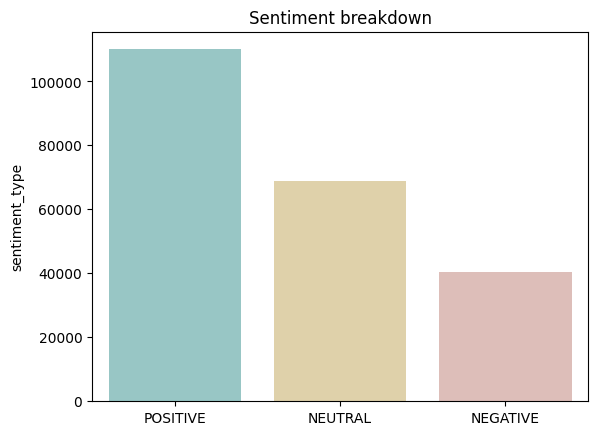

In [574]:
colors = ["#90CECC", "#E8D5A1", "#E3BAB3"]

sns.barplot(data=df_new,x=df_new['sentiment_type'].value_counts().index,y=df_new['sentiment_type'].value_counts(), palette=colors)
plt.title('Sentiment breakdown', fontsize=12)




---



### **Sentiment: Pie Chart**

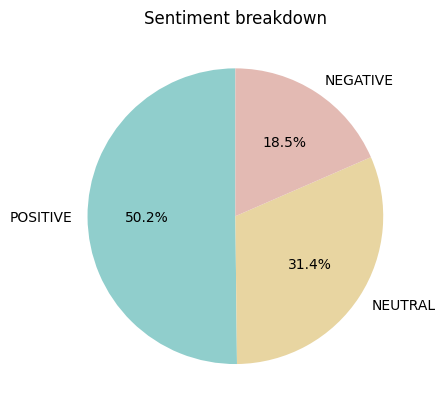

In [575]:
colors = ["#90CECC", "#E8D5A1", "#E3BAB3"]

counts = df_new['sentiment_type'].value_counts()
fig, ax = plt.subplots()
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Sentiment breakdown')
plt.show()



---



### **Conversation volume over time**

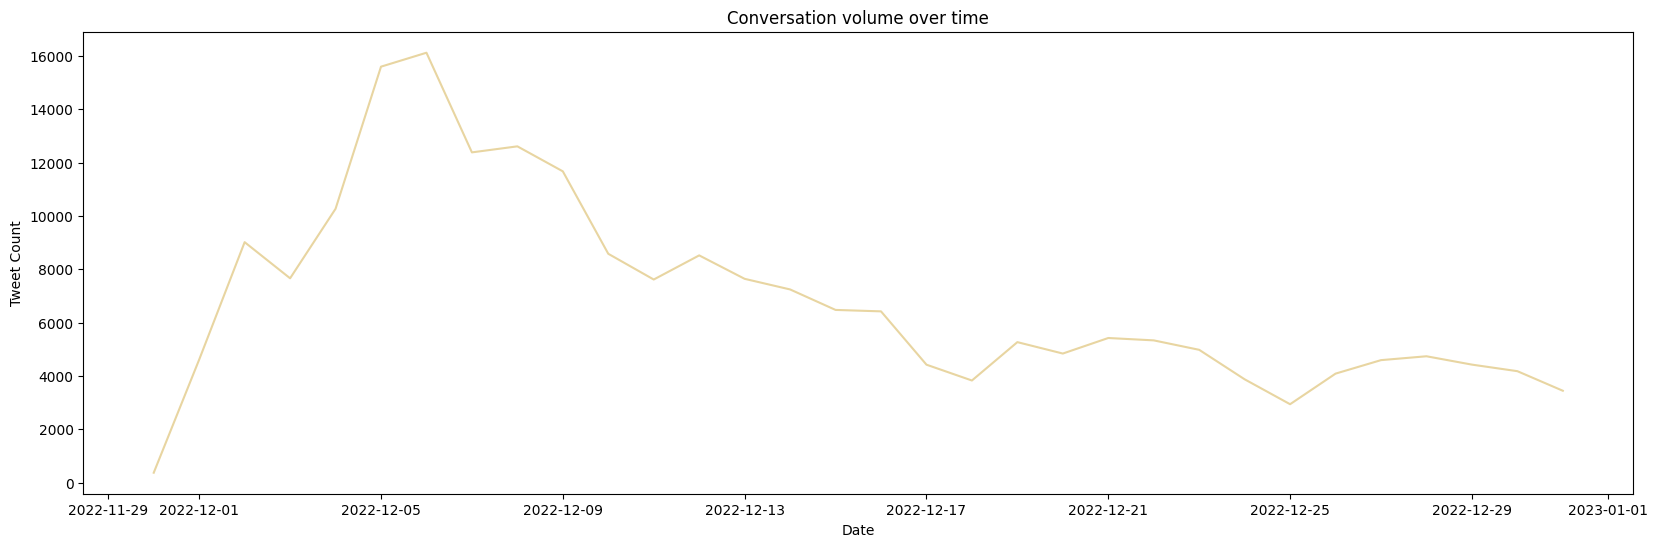

In [576]:
# Converting the date to a 'datetime' format
df_new['created_at'] = pd.to_datetime(df_new['created_at'])

# Grouping the data by day and calculating the count
df_daily_count = df_new.groupby(df_new['created_at'].dt.date).size()

# Plotting the data on a line chart
plt.figure(figsize=(20, 6))
plt.plot(df_daily_count.index, df_daily_count.values, color='#E8D5A1')
plt.title('Conversation volume over time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.show()



---



### **Average sentiment over time**

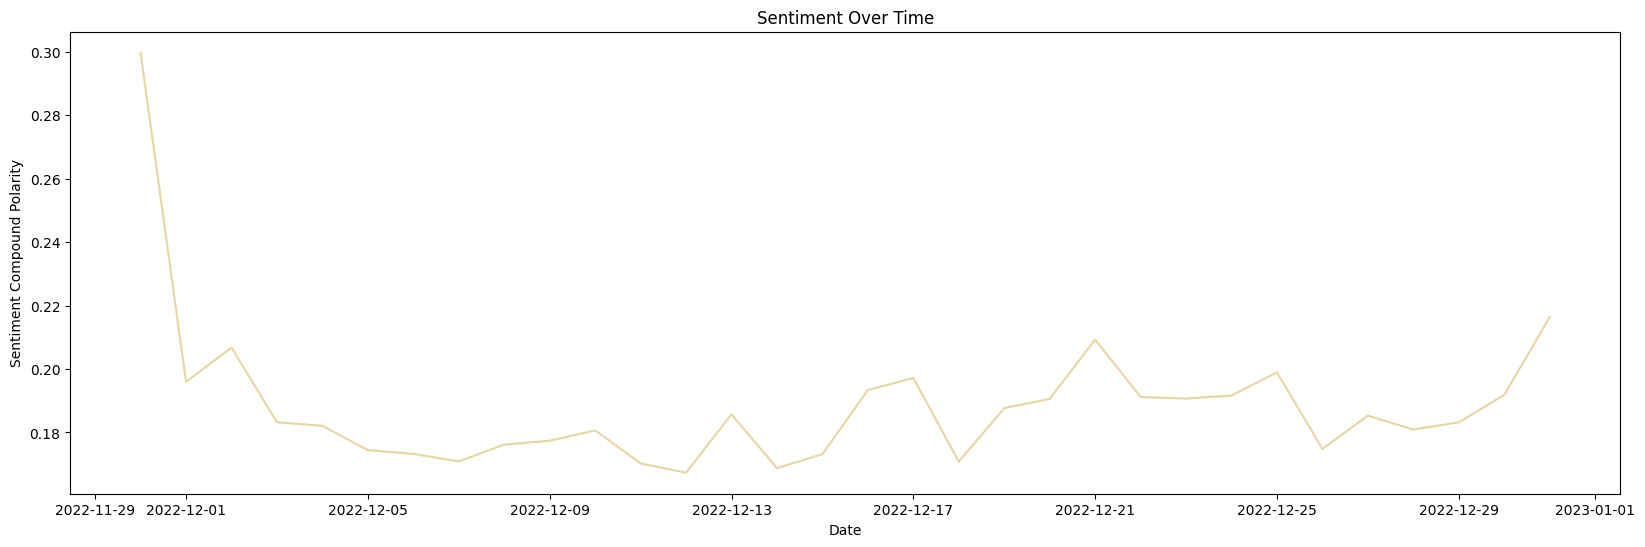

In [577]:
#Converting the date to a 'datetime' format.
df_new['created_at'] = pd.to_datetime(df_new['created_at'])

#Grouping the average sentiment data by day. 
df_sentiment_over_time = df_new.groupby(pd.Grouper(key='created_at', freq='D')).mean(numeric_only=True)

#Plotting the data on a line chart. 
plt.figure(figsize=(20, 6))
plt.plot(df_sentiment_over_time.index, df_sentiment_over_time['sentiment_compound_polarity'], color='#E8D5A1')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Compound Polarity')
plt.show()



---



### **Sentiment over time: Daily count per sentiment category**

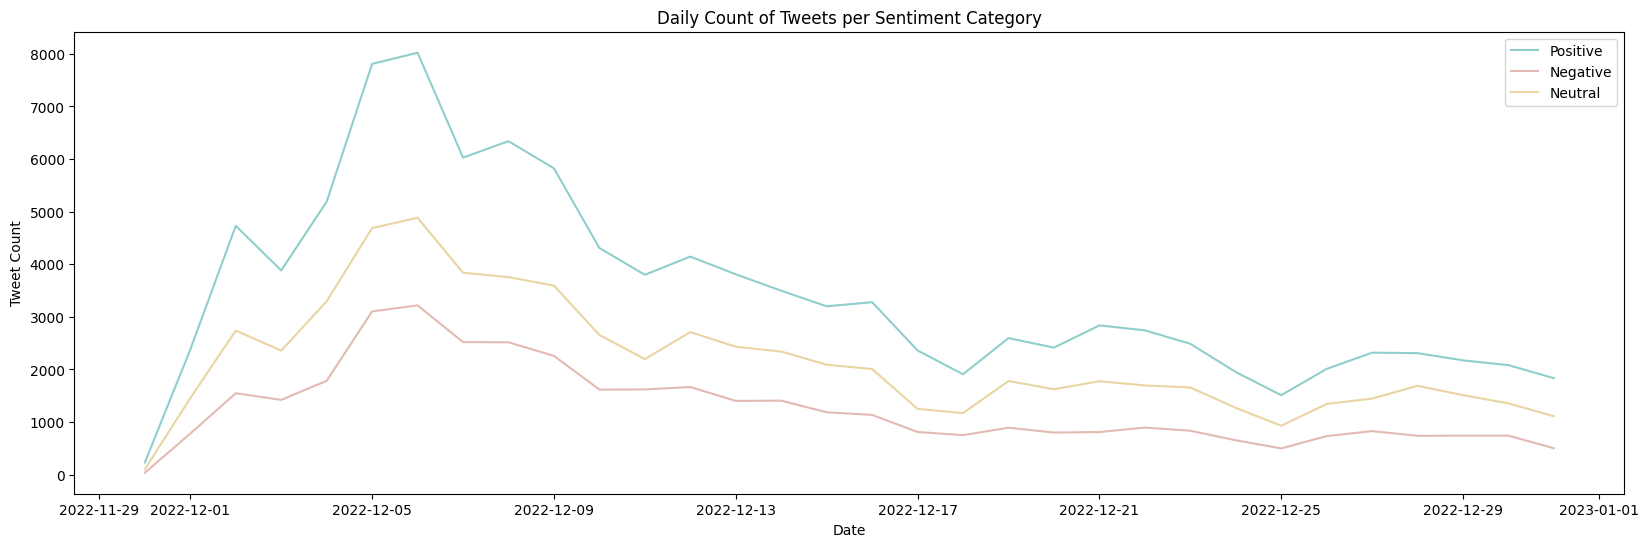

In [578]:
# Group the data by daily time period and sentiment category, and calculating the count
df_tweet_count = df_new.groupby([pd.Grouper(key='created_at', freq='D'), 'sentiment_type']).size().unstack()

# Plot the count of tweets for each sentiment category over time
plt.figure(figsize=(20, 6))
plt.plot(df_tweet_count.index, df_tweet_count['POSITIVE'], label='Positive', color='#90CECC')
plt.plot(df_tweet_count.index, df_tweet_count['NEGATIVE'], label='Negative', color='#E3BAB3')
plt.plot(df_tweet_count.index, df_tweet_count['NEUTRAL'], label='Neutral', color='#E8D5A1')

plt.title('Daily Count of Tweets per Sentiment Category')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend()
plt.show()



---



### **Engagement over time**

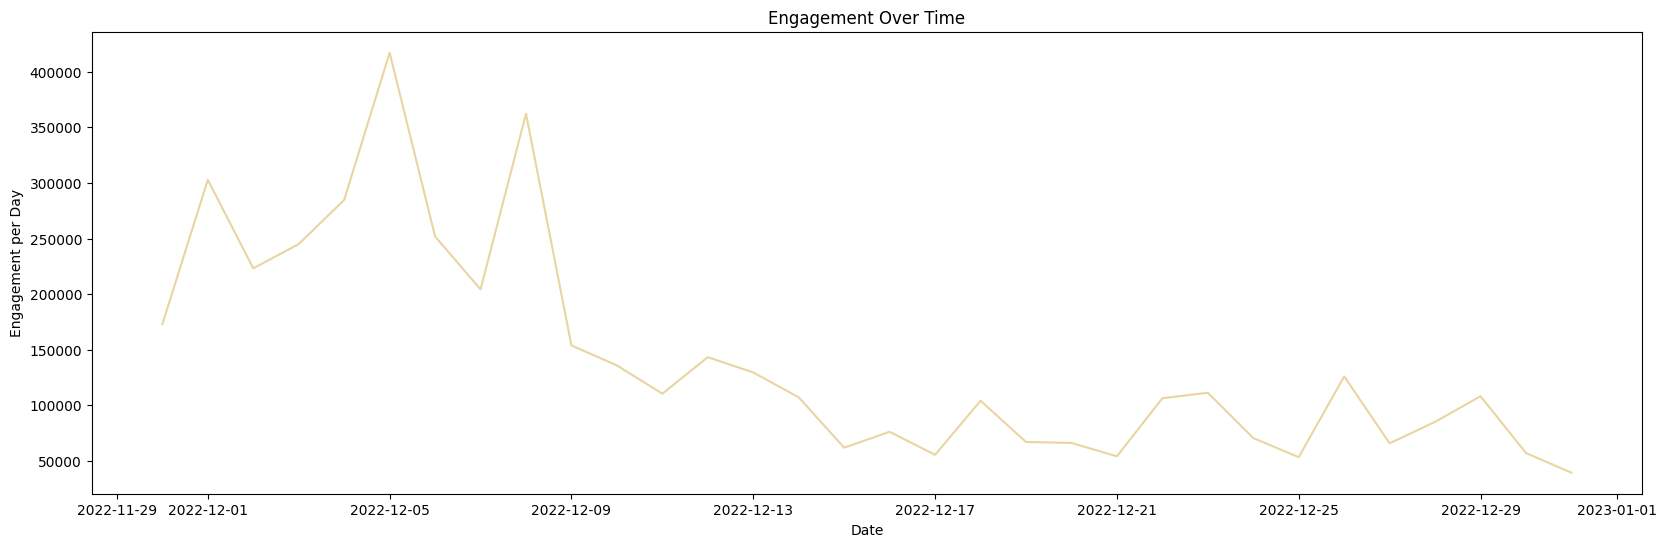

In [579]:
# Converting the date to a 'datetime' format
df_new['created_at'] = pd.to_datetime(df_new['created_at'])

# Calculating the total engagement per day.
daily_engagement = df_new[['like_count', 'quote_count', 'reply_count', 'retweet_count']].sum(axis=1)

# Grouping the data by day
df_daily_engagement = df_new.groupby(pd.Grouper(key='created_at', freq='D')).sum(numeric_only=True)

# Plotting the data on a line chart
plt.figure(figsize=(20, 6))
plt.plot(df_daily_engagement.index, df_daily_engagement['like_count'] + df_daily_engagement['quote_count'] + df_daily_engagement['reply_count'] + df_daily_engagement['retweet_count'], color='#E8D5A1')
plt.title('Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement per Day')
plt.show()




---



### **Word Cloud: Positive Tweets**

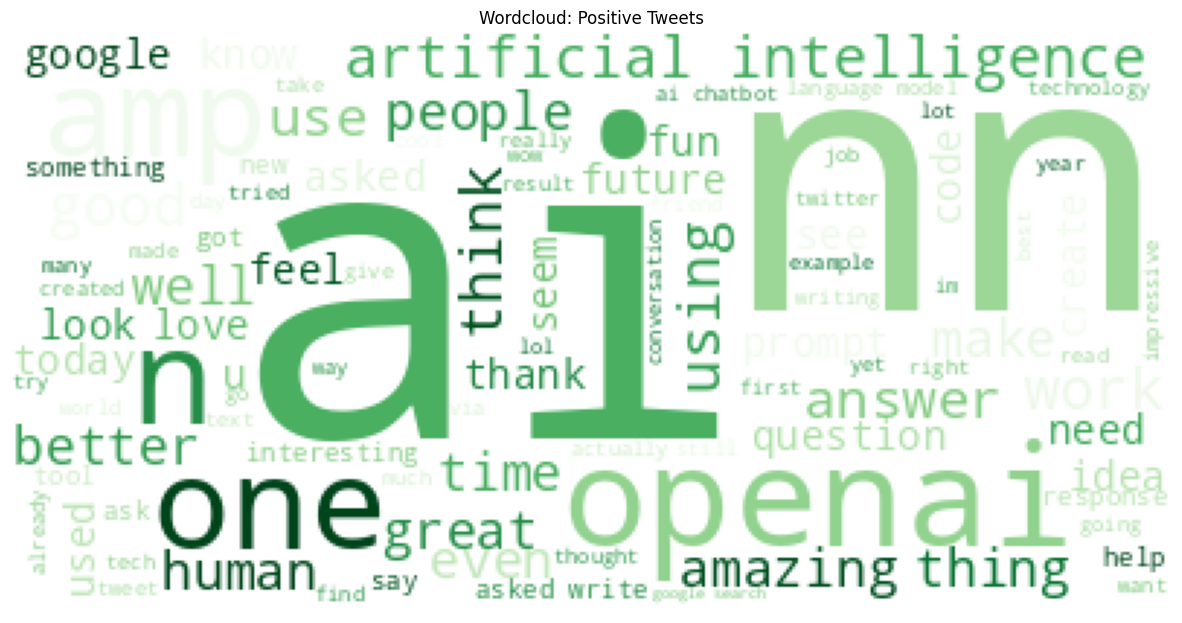

In [580]:
# Creating a new data frame that shows the 30 most common words in the 'final_tweet' column of 'eda'. 

eda=df_new.copy()

eda['temp_list'] = eda['final_tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in eda['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(30))
temp.columns = ['Common_words','count']

# Creating the word cloud using text from positive-sentiment tweets.

plt.figure(figsize=(15,10))
text=' '.join(eda[eda['sentiment_type']=='POSITIVE']['final_tweet'])
wordcloud=WordCloud(max_words=100, background_color='white', colormap='Greens').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud: Positive Tweets')
plt.show()



---



### **Word Cloud: Negative Tweets**

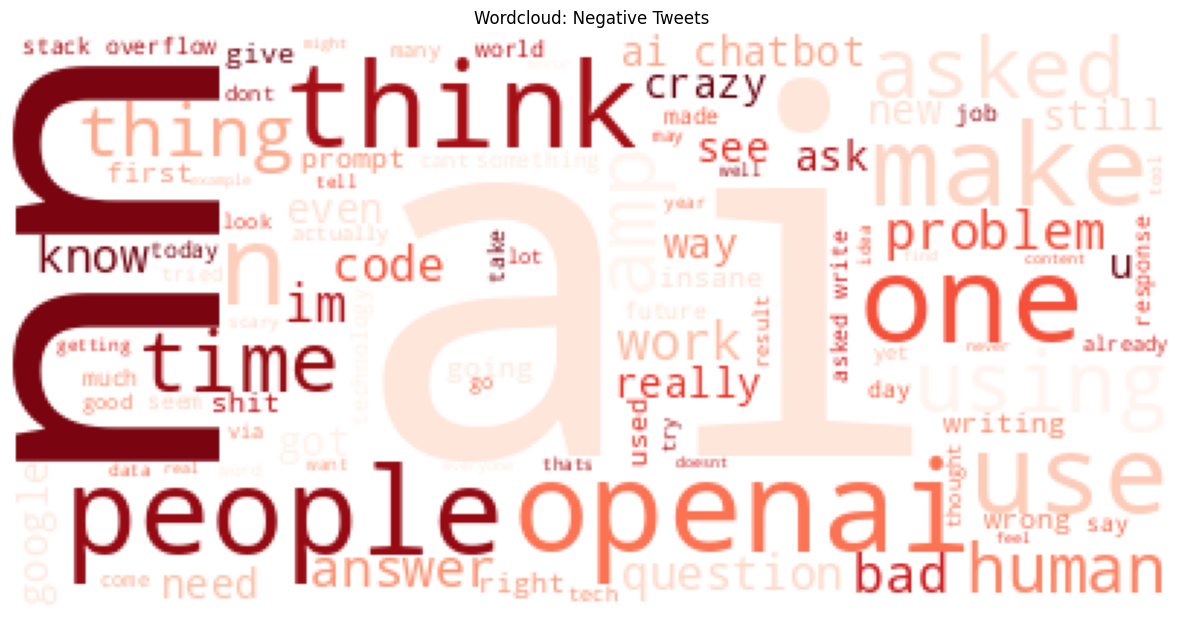

In [581]:
# Creating the word cloud using text from negative-sentiment tweets.

plt.figure(figsize=(15,10))
text=' '.join(eda[eda['sentiment_type']=='NEGATIVE']['final_tweet'])
wordcloud=WordCloud(max_words=100,background_color='white',colormap='Reds').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud: Negative Tweets')
plt.show()



---



### **Topic Analysis: Use-cases**




In [582]:
# Defining and labelling the keyword groups for analysis. 
use_cases = {'Programming': ['python', 'programming', 'coding', 'code', 'syntax', 'debug', 'debugging', 'markdown', 'error-check', 'shinyapps', 'react', 'ruby on rails'],
                  'Writing': ['writing', 'essay', 'assignment', 'write', 'stories', 'story', 'post', 'blog', 'article'],
                  'Communication': ['text', 'message', 'email', 'letter', 'memo', 'meeting'],
                  'Research': ['research', 'search', 'wiki', 'wikipedia', 'paper', 'dissertation', 'thesis'],
                  'Creativity': ['idea', 'ideas', 'poem', 'haiku', 'song', 'episode', 'rhyme', 'lyrics', 'art', 'portrait', 'rap'],
                  'Education': ['exam', 'assignment', 'essay', 'tutor', 'homework', 'undergraduate', 'student', 'teacher', 'quiz', 'papers']}

# Creating a dictionary to store the count of tweets for each group.
use_cases_counts = {}

# Looping over the keyword groups and count the number of tweets that contain any keyword in the group.
for group_label, group_keywords in use_cases.items():
    mask = df['tweet'].str.contains('|'.join(group_keywords), case=False)
    use_cases_counts[group_label] = mask.sum()

# Calculating the total number of tweets in the dataset.
total_tweets = len(df)

# Looping over the keyword groups and calculate the percentage of tweets that contain any keyword in the group.
for group_label, group_count in use_cases_counts.items():
    group_percentage = group_count / total_tweets * 100
    print(f'The "{group_label}" group appears in {group_percentage:.2f}% of the tweets.')

The "Programming" group appears in 7.20% of the tweets.
The "Writing" group appears in 16.40% of the tweets.
The "Communication" group appears in 4.23% of the tweets.
The "Research" group appears in 5.01% of the tweets.
The "Creativity" group appears in 17.37% of the tweets.
The "Education" group appears in 5.60% of the tweets.


<p>





---



### **Topic Analysis: Use-cases > Bar chart**

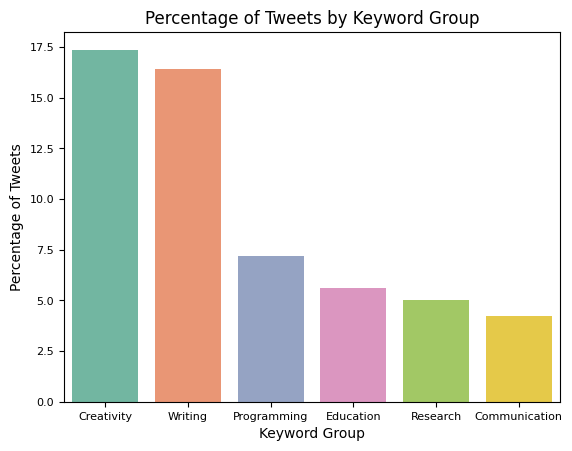

In [583]:
# Creating a list of the percentage of tweets that contain each keyword group.
use_cases_percentages = [(group_label, group_count / total_tweets * 100) for group_label, group_count in use_cases_counts.items()]

# Sorting the list by percentage in descending order.
use_cases_percentages.sort(key=lambda x: x[1], reverse=True)

# Extracting the group labels and percentages into separate lists.
group_labels = [x[0] for x in use_cases_percentages]
use_cases_percentages = [x[1] for x in use_cases_percentages]

# Creating a bar chart of the group percentages.
sns.barplot(x=group_labels, y=use_cases_percentages, palette='Set2')
plt.title('Percentage of Tweets by Keyword Group', fontsize=12)
plt.xlabel('Keyword Group', fontsize=10)
plt.ylabel('Percentage of Tweets', fontsize=10)
plt.xticks(fontsize=8) #change x-axis tick label size
plt.yticks(fontsize=8) #change y-axis tick label size
plt.show()

In [584]:
#Exporting the output for visualisation.

# Define the file name for the CSV output
filename = "use_cases_group_counts.csv"

# Open the CSV file and write the header row
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Keyword Group", "Tweet Count"])

    # Loop through each group and write the label and count to the CSV
    for group, count in use_cases_counts.items():
        writer.writerow([group, count])



---



### **Topic Sentiment Analysis: Programming**

In [585]:
# Defining the list of keywords for the 'Programming' category. 
programming_keywords = ['python', 'programming', 'coding', 'code', 'syntax', 'debug', 'debugging', 'markdown', 'error-check', 'shinyapps', 'react', 'ruby on rails']

# Creating a new dataframe with tweets containing the keywords. 
programming = df_new[df_new['final_tweet'].str.contains('|'.join(programming_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
programming.loc[programming.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
programming.loc[programming.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
programming.loc[programming.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

programming.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
37,1598021221408706560,2022-11-30 18:28:43+00:00,3,0,0,0,asked basics python gave truly educational ans...,1,36,172,15,asked basic python gave truly educational answ...,0.7178,0.700,0.000,0.300,POSITIVE
44,1598023273304182784,2022-11-30 18:36:52+00:00,774,32,28,126,playing around released nnits like gpt3 easy u...,0,49,261,18,playing around released nnits like gpt3 easy u...,0.8271,0.703,0.000,0.297,POSITIVE
80,1598039351086223376,2022-11-30 19:40:46+00:00,2,0,1,0,sometimes openais breaks code boxes trying dra...,0,32,164,11,sometimes openais break code box trying draw a...,0.3818,0.758,0.081,0.162,POSITIVE
93,1598042665375105024,2022-11-30 19:53:56+00:00,6768,371,119,1038,could good debugging companion explains bug fi...,0,22,111,10,could good debugging companion explains bug fi...,0.4404,0.734,0.000,0.266,POSITIVE
185,1598066566687379456,2022-11-30 21:28:54+00:00,3,0,0,0,chapgpt ai dialogue found also used comment co...,0,45,226,19,chapgpt ai dialogue found also used comment co...,0.0000,1.000,0.000,0.000,NEUTRAL


<p>



In [586]:
#Calculating the mean sentiment for the 'Programming' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = programming.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.401190
NEUTRAL     0.000000
POSITIVE    0.518452
Name: sentiment_compound_polarity, dtype: float64


<p>



In [587]:
# Exporting the output to for data visualisation.

programming.to_csv('programming.csv', index=False)



---



### **Sentiment bar chart: Programming**

Text(0.5, 1.0, 'Use-case: Progamming')

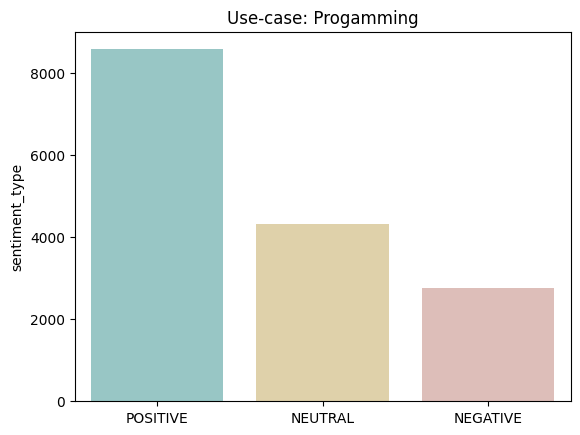

In [588]:
colors = ["#90CECC", "#E8D5A1", "#E3BAB3"]

sns.barplot(data=programming,x=programming['sentiment_type'].value_counts().index,y=programming['sentiment_type'].value_counts(), palette=colors)

plt.title('Use-case: Progamming', fontsize=12)



---



### **Topic Sentiment Analysis: Writing**

In [589]:
# Defining the list of keywords for the 'Writing' category. 
writing_keywords = ['writing', 'essay', 'assignment', 'write', 'stories', 'story', 'post', 'blog', 'article']

# Creating a new dataframe with tweets containing the keywords. 
writing = df_new[df_new['final_tweet'].str.contains('|'.join(writing_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
writing.loc[writing.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
writing.loc[writing.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
writing.loc[writing.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

writing.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,optimizing language models dialogue ai machine...,4,26,239,3,optimizing language model dialogue ai machinel...,0.4588,0.857,0.000,0.143,POSITIVE
12,1598016760719999018,2022-11-30 18:11:00+00:00,0,0,0,0,optimizing language models dialogue ai machine...,4,26,239,3,optimizing language model dialogue ai machinel...,0.4588,0.857,0.000,0.143,POSITIVE
44,1598023273304182784,2022-11-30 18:36:52+00:00,774,32,28,126,playing around released nnits like gpt3 easy u...,0,49,261,18,playing around released nnits like gpt3 easy u...,0.8271,0.703,0.000,0.297,POSITIVE
47,1598025876675121152,2022-11-30 18:47:13+00:00,1,0,0,0,asked write telugu song cereal mixed milk chic...,0,19,119,6,asked write telugu song cereal mixed milk chic...,0.0000,1.000,0.000,0.000,NEUTRAL
48,1598026433062137856,2022-11-30 18:49:26+00:00,7,0,1,2,essay requested scary words nn work inspired m...,0,44,230,17,essay requested scary word nn work inspired ma...,0.7269,0.397,0.229,0.374,POSITIVE


<p>



In [590]:
#Calculating the mean sentiment for the 'Writing' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = writing.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.412731
NEUTRAL     0.000000
POSITIVE    0.514105
Name: sentiment_compound_polarity, dtype: float64


<p>



In [591]:
# Exporting the output to for data visualisation.

writing.to_csv('writing.csv', index=False)



---



### **Sentiment bar chart: Writing**

Text(0.5, 1.0, 'Use-case: Writing')

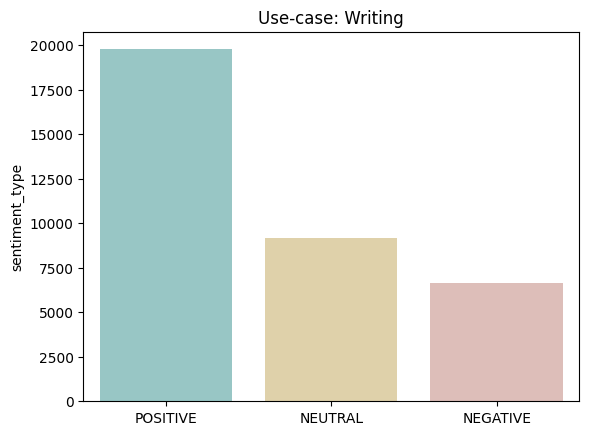

In [592]:
colors = ["#90CECC", "#E8D5A1", "#E3BAB3"]

sns.barplot(data=writing,x=writing['sentiment_type'].value_counts().index,y=writing['sentiment_type'].value_counts(), palette=colors)

plt.title('Use-case: Writing', fontsize=12)



---



### **Topic Sentiment Analysis: Communication**

In [593]:
# Defining the list of keywords for the 'Communication' category. 
communication_keywords = ['text', 'message', 'email', 'letter', 'memo', 'meeting']

# Creating a new dataframe with tweets containing the keywords. 
communication = df_new[df_new['final_tweet'].str.contains('|'.join(communication_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
communication.loc[communication.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
communication.loc[communication.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
communication.loc[communication.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

communication.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
24,1598018704796569601,2022-11-30 18:18:43+00:00,52,0,4,7,research preview today excited get feedback es...,0,36,223,11,research preview today excited get feedback es...,0.5095,0.651,0.098,0.251,POSITIVE
49,1598026714881327104,2022-11-30 18:50:33+00:00,1,0,0,0,tried exciting holds memory really good explai...,0,33,226,10,tried exciting hold memory really good explain...,0.9200,0.457,0.000,0.543,POSITIVE
60,1598030775689302016,2022-11-30 19:06:41+00:00,3527,80,68,556,openai released damn good might gpt4 starting ...,0,31,170,13,openai released damn good might gpt4 starting ...,0.0516,0.663,0.163,0.175,POSITIVE
134,1598052537193611264,2022-11-30 20:33:09+00:00,76,0,6,0,im gon na open second monitor time im gon na p...,0,41,164,19,im gon na open second monitor time im gon na p...,0.3612,0.902,0.000,0.098,POSITIVE
165,1598061800398163968,2022-11-30 21:09:58+00:00,0,0,1,0,ive talking evening wow actual playgroundnni a...,0,49,223,21,ive talking evening wow actual playgroundnni a...,0.8834,0.671,0.000,0.329,POSITIVE


<p>



In [594]:
#Calculating the mean sentiment for the 'Communication' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = communication.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.397793
NEUTRAL     0.000000
POSITIVE    0.542333
Name: sentiment_compound_polarity, dtype: float64


<p>



In [595]:
# Exporting the output to for data visualisation.

communication.to_csv('communication.csv', index=False)



---



### **Sentiment bar chart: Communication**

Text(0.5, 1.0, 'Use-case: Communication')

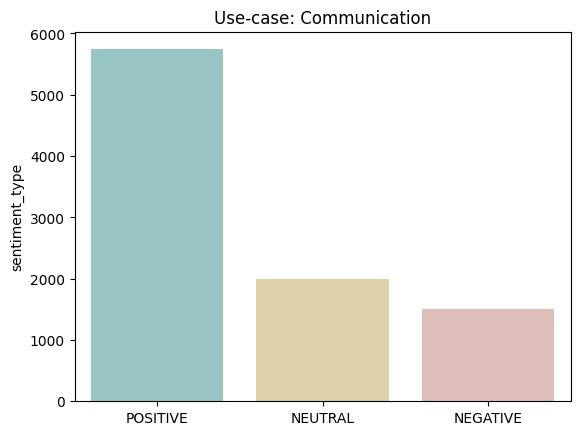

In [596]:
colors = ["#90CECC", "#E8D5A1", "#E3BAB3"]

sns.barplot(data=communication,x=communication['sentiment_type'].value_counts().index,y=communication['sentiment_type'].value_counts(), palette=colors)

plt.title('Use-case: Communication', fontsize=12)



---



### **Topic Sentiment Analysis: Research**

In [597]:
# Defining the list of keywords for the 'Research' category. 
research_keywords = ['research', 'search', 'wiki', 'wikipedia', 'paper', 'dissertation', 'thesis']

# Creating a new dataframe with tweets containing the keywords. 
research = df_new[df_new['final_tweet'].str.contains('|'.join(research_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
research.loc[research.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
research.loc[research.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
research.loc[research.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

research.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
9,1598016510588354560,2022-11-30 18:10:00+00:00,101,3,6,12,research preview newest model nnwere trying so...,0,22,156,6,research preview newest model nnwere trying so...,0.5106,0.798,0.000,0.202,POSITIVE
17,1598017439136362496,2022-11-30 18:13:41+00:00,2,0,0,1,ai models set become search engines future atm...,4,27,151,11,ai model set become search engine future atm s...,-0.3182,0.850,0.150,0.000,NEGATIVE
24,1598018704796569601,2022-11-30 18:18:43+00:00,52,0,4,7,research preview today excited get feedback es...,0,36,223,11,research preview today excited get feedback es...,0.5095,0.651,0.098,0.251,POSITIVE
29,1598019548204396545,2022-11-30 18:22:04+00:00,1,0,0,1,n research early stage gpt3 optimised chat rem...,0,18,119,4,n research early stage gpt3 optimised chat rem...,0.4019,0.722,0.000,0.278,POSITIVE
30,1598019672255107072,2022-11-30 18:22:34+00:00,391,12,33,47,research preview nnit optimized dialogue ready...,0,30,159,15,research preview nnit optimized dialogue ready...,0.7304,0.484,0.109,0.407,POSITIVE


<p>



In [598]:
#Calculating the mean sentiment for the 'Research' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = research.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.420759
NEUTRAL     0.000000
POSITIVE    0.525163
Name: sentiment_compound_polarity, dtype: float64


<p>



In [599]:
# Exporting the output to for data visualisation.

research.to_csv('research.csv', index=False)



---



### **Sentiment bar chart: Research**

Text(0.5, 1.0, 'Use-case: Research')

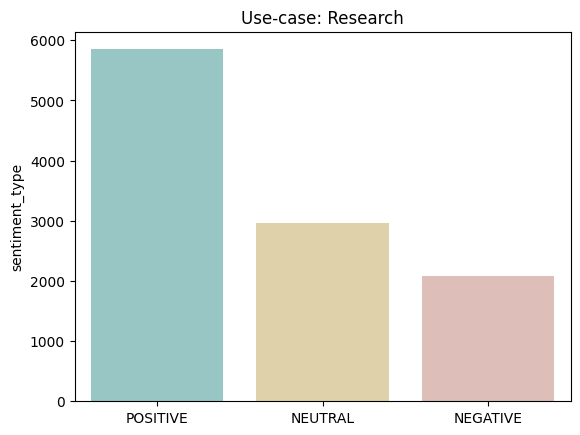

In [600]:
colors = ["#90CECC", "#E8D5A1", "#E3BAB3"]

sns.barplot(data=research,x=research['sentiment_type'].value_counts().index,y=research['sentiment_type'].value_counts(), palette=colors)

plt.title('Use-case: Research', fontsize=12)



---



### **Topic Sentiment Analysis: Creativity**



In [601]:
# Defining the list of keywords for the 'Creativity' category. 
creativity_keywords = ['idea', 'ideas', 'poem', 'haiku', 'song', 'episode', 'rhyme', 'lyrics', 'art', 'portrait', 'rap']

# Creating a new dataframe with tweets containing the keywords. 
creativity = df_new[df_new['final_tweet'].str.contains('|'.join(creativity_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
creativity.loc[creativity.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
creativity.loc[creativity.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
creativity.loc[creativity.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

creativity.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,optimizing language models dialogue ai machine...,4,26,239,3,optimizing language model dialogue ai machinel...,0.4588,0.857,0.0,0.143,POSITIVE
12,1598016760719999018,2022-11-30 18:11:00+00:00,0,0,0,0,optimizing language models dialogue ai machine...,4,26,239,3,optimizing language model dialogue ai machinel...,0.4588,0.857,0.0,0.143,POSITIVE
26,1598019320801824768,2022-11-30 18:21:10+00:00,4,0,0,1,folk released looks like key innovation retain...,0,31,198,8,folk released look like key innovation retains...,0.6249,0.746,0.0,0.254,POSITIVE
36,1598020781065527296,2022-11-30 18:26:58+00:00,23201,827,477,4024,ok new basically generate aiart prompts asked ...,2,31,189,9,ok new basically generate aiart prompt asked o...,0.4767,0.796,0.0,0.204,POSITIVE
38,1598021341218631682,2022-11-30 18:29:12+00:00,14,1,9,1,curious behavior often starts saying doesnt kn...,0,35,187,17,curious behavior often start saying doesnt kno...,0.3182,0.874,0.0,0.126,POSITIVE


<p>



In [602]:
#Calculating the mean sentiment for the 'Creativity' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = creativity.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.396498
NEUTRAL     0.000000
POSITIVE    0.548810
Name: sentiment_compound_polarity, dtype: float64


<p>



In [603]:
# Exporting the output to for data visualisation.

creativity.to_csv('creativity.csv', index=False)



---



### **Sentiment bar chart: Creativity**

Text(0.5, 1.0, 'Use-case: Creativity')

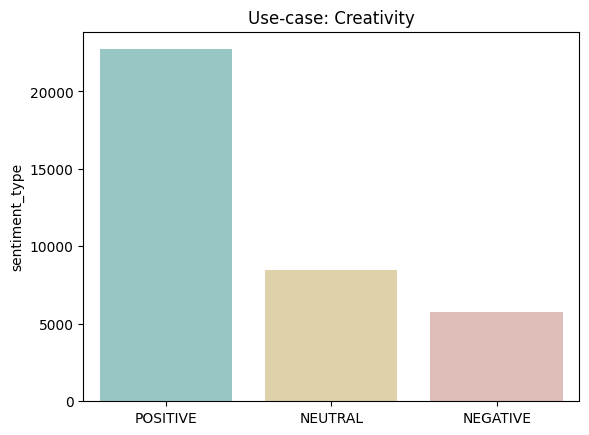

In [604]:
colors = ["#90CECC", "#E8D5A1", "#E3BAB3"]

sns.barplot(data=creativity,x=creativity['sentiment_type'].value_counts().index,y=creativity['sentiment_type'].value_counts(),palette=colors)

plt.title('Use-case: Creativity', fontsize=12)



---



### **Topic Sentiment Analysis: Education**

In [605]:
# Defining the list of keywords for the 'Education' category. 
education_keywords = ['exam', 'assignment', 'essay', 'tutor', 'homework', 'undergraduate', 'student', 'teacher', 'quiz', 'papers']

# Creating a new dataframe with tweets containing the keywords. 
education = df_new[df_new['final_tweet'].str.contains('|'.join(education_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
education.loc[education.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
education.loc[education.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
education.loc[education.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

education.head()


,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
48,1598026433062137856,2022-11-30 18:49:26+00:00,7,0,1,2,essay requested scary words nn work inspired m...,0,44,230,17,essay requested scary word nn work inspired ma...,0.7269,0.397,0.229,0.374,POSITIVE
54,1598028544650915840,2022-11-30 18:57:49+00:00,9,0,3,1,english essay writing going go toss,0,15,84,5,english essay writing going go toss,0.0000,1.000,0.000,0.000,NEUTRAL
188,1598067331359703040,2022-11-30 21:31:57+00:00,23,3,3,9,new knows abcnotation amp musictheory explains...,3,37,198,15,new know abcnotation amp musictheory explains ...,0.7650,0.680,0.000,0.320,POSITIVE
213,1598071814063726592,2022-11-30 21:49:45+00:00,5,0,0,0,cute knows play mahjong even diff sichuan japa...,1,27,160,8,cute know play mahjong even diff sichuan japan...,0.8074,0.546,0.000,0.454,POSITIVE
289,1598085625584181248,2022-11-30 22:44:38+00:00,62,3,11,8,3 quickly defeated part based examples 2019 book,1,16,124,5,3 quickly defeated part based example 2019 book,-0.4767,0.659,0.341,0.000,NEGATIVE


<p>



In [606]:
#Calculating the mean sentiment for the 'Education' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = education.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.435247
NEUTRAL     0.000000
POSITIVE    0.508018
Name: sentiment_compound_polarity, dtype: float64


<p>



In [607]:
# Exporting the output to for data visualisation.

education.to_csv('education.csv', index=False)



---



### **Sentiment bar chart: Education**

Text(0.5, 1.0, 'Use-case: Education')

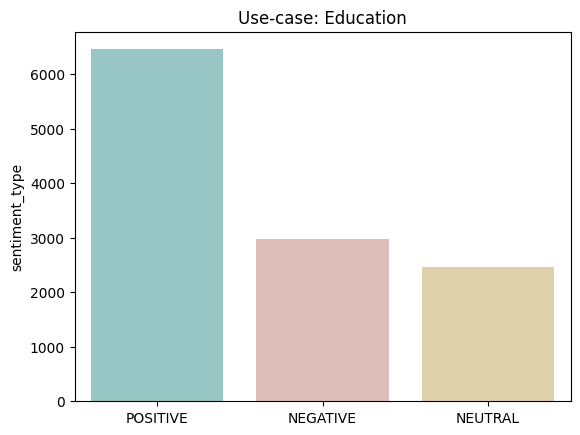

In [608]:
colors = ["#90CECC", "#E3BAB3", "#E8D5A1"]

sns.barplot(data=education,x=education['sentiment_type'].value_counts().index,y=education['sentiment_type'].value_counts(),palette=colors)

plt.title('Use-case: Education', fontsize=12)



---



### **Topic Analysis: Common issues**

In [609]:
# Defining and labelling the keyword groups for analysis. 
common_issues = {'Hallucinations': ['hallucination', 'hallucinate', 'unfactual', 'incorrect', 'inaccurate', 'unverified'],
                  'Ethical implications': ['ethics', 'bias', 'ethical', 'plagiarism', 'copyright'],
                  'Disinformation': ['disinformation', 'misinformation', 'libel', 'slander', 'propaganda'],
                  'Abusive Language': ['racism', 'racist', 'misogyny', 'sexism', 'sexist', 'hate speech', 'abusive language', 'anti-semitism']}

# Creating a dictionary to store the count of tweets for each group.
common_issues_counts = {}

# Looping over the keyword groups and counting the number of tweets that contain any keyword in the group.
for group_label, group_keywords in common_issues.items():
    mask = df['tweet'].str.contains('|'.join(group_keywords), case=False)
    common_issues_counts[group_label] = mask.sum()

# Calculating the total number of tweets in the dataset.
total_tweets = len(df)

# Looping over the keyword groups and calculate the percentage of tweets that contain any keyword in the group.
for group_label, group_count in common_issues_counts.items():
    group_percentage = group_count / total_tweets * 100
    print(f'The "{group_label}" group appears in {group_percentage:.2f}% of the tweets.')

The "Hallucinations" group appears in 0.43% of the tweets.
The "Ethical implications" group appears in 1.25% of the tweets.
The "Disinformation" group appears in 0.23% of the tweets.
The "Abusive Language" group appears in 0.13% of the tweets.


<p>





---



### **Topic Analysis: Common issues > Bar chart**

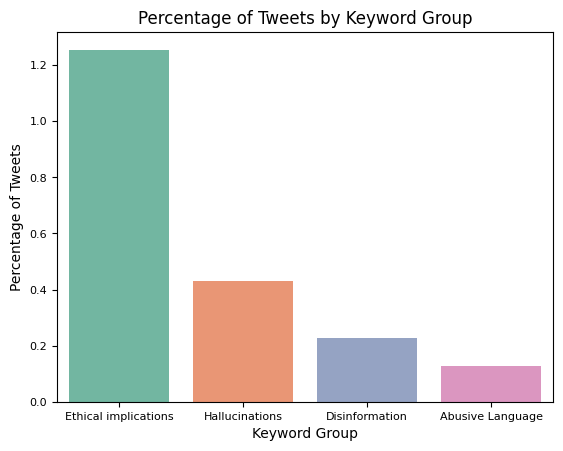

In [610]:
# Creating a list of the percentage of tweets that contain each keyword group.
common_issues_percentages = [(group_label, group_count / total_tweets * 100) for group_label, group_count in group_counts.items()]

# Sorting the list by percentage in descending order.
common_issues_percentages.sort(key=lambda x: x[1], reverse=True)

# Extracting the group labels and percentages into separate lists.
group_labels = [x[0] for x in common_issues_percentages]
common_issues_percentages = [x[1] for x in common_issues_percentages]

# Creating a bar chart of the group percentages.
sns.barplot(x=group_labels, y=common_issues_percentages, palette='Set2')
plt.title('Percentage of Tweets by Keyword Group', fontsize=12)
plt.xlabel('Keyword Group', fontsize=10)
plt.ylabel('Percentage of Tweets', fontsize=10)
plt.xticks(fontsize=8) #change x-axis tick label size
plt.yticks(fontsize=8) #change y-axis tick label size
plt.show()



---



### **Topic Sentiment Analysis: Hallucinations**



In [611]:
# Defining the list of keywords for the 'Hallucinations' category. 
hallucination_keywords = ['hallucination', 'hallucinate', 'unfactual', 'incorrect', 'inaccurate', 'unverified']

# Creating a new dataframe with tweets containing the keywords. 
hallucinations = df_new[df_new['final_tweet'].str.contains('|'.join(hallucination_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
hallucinations.loc[hallucinations.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
hallucinations.loc[hallucinations.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
hallucinations.loc[hallucinations.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

hallucinations.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
97,1598043498535858176,2022-11-30 19:57:14+00:00,10,0,2,0,quest get answer simple question incorrectly s...,0,14,88,4,quest get answer simple question incorrectly s...,0.4215,0.682,0.000,0.318,POSITIVE
106,1598045661743964163,2022-11-30 20:05:50+00:00,0,0,0,0,awesome nnbut also still gives straightup inco...,0,11,112,1,awesome nnbut also still give straightup incor...,0.6249,0.631,0.000,0.369,POSITIVE
109,1598046124950310912,2022-11-30 20:07:41+00:00,1,0,0,0,“ weve trained model called interacts conversa...,0,35,234,9,“ weve trained model called interacts conversa...,-0.4588,0.687,0.195,0.118,NEGATIVE
138,1598053568422248448,2022-11-30 20:37:15+00:00,4027,136,85,508,openais new appears defeat hofstadterbenders l...,0,29,228,9,openais new appears defeat hofstadterbenders l...,-0.4588,0.833,0.167,0.000,NEGATIVE
166,1598061812821401600,2022-11-30 21:10:01+00:00,3,0,0,0,openais conversational ai model free play answ...,0,25,181,5,openais conversational ai model free play answ...,0.4019,0.442,0.205,0.353,POSITIVE


<p>



In [612]:
#Calculating the mean sentiment for the 'Hallucinations' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = hallucinations.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.400403
NEUTRAL     0.000000
POSITIVE    0.515378
Name: sentiment_compound_polarity, dtype: float64


<p>



In [613]:
# Exporting the output to for data visualisation.

hallucinations.to_csv('hallucinations.csv', index=False)



---



### **Sentiment bar chart: Hallucinations**

Text(0.5, 1.0, 'Common issues: Hallucinations')

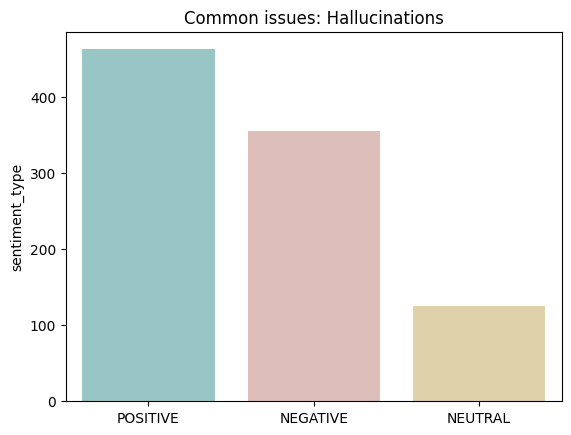

In [614]:
colors = ["#90CECC", "#E3BAB3", "#E8D5A1"]

sns.barplot(data=hallucinations,x=hallucinations['sentiment_type'].value_counts().index,y=hallucinations['sentiment_type'].value_counts(),palette=colors)

plt.title('Common issues: Hallucinations', fontsize=12)



---



### **Topic Sentiment Analysis: Ethical concerns**



In [615]:
# Defining the list of keywords for the 'Ethical concerns' category. 
ethics_keywords = ['ethics', 'bias', 'ethical', 'plagiarism', 'copyright']

# Creating a new dataframe with tweets containing the keywords. 
ethics = df_new[df_new['final_tweet'].str.contains('|'.join(ethics_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
ethics.loc[ethics.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
ethics.loc[ethics.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
ethics.loc[ethics.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

ethics.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
275,1598083191637938176,2022-11-30 22:34:58+00:00,28,0,0,5,ohh interesting see bias bounty report cited m...,0,25,203,7,ohh interesting see bias bounty report cited m...,0.5719,0.552,0.097,0.352,POSITIVE
466,1598123324592168960,2022-12-01 01:14:26+00:00,6,1,1,0,failed bias check,0,6,48,1,failed bias check,-0.5719,0.175,0.825,0.000,NEGATIVE
584,1598149127862616064,2022-12-01 02:56:58+00:00,2,0,0,0,able answer pretty specific questions gnns har...,1,46,232,15,able answer pretty specific question gnns hard...,0.8316,0.570,0.123,0.307,POSITIVE
899,1598188699640111104,2022-12-01 05:34:13+00:00,3,0,1,0,wont answer directly trained copyrighted infor...,0,27,170,13,wont answer directly trained copyrighted infor...,0.0000,1.000,0.000,0.000,NEUTRAL
1047,1598205310061400064,2022-12-01 06:40:13+00:00,34,3,11,8,settle debate asked ai generated content copyr...,1,20,114,5,settle debate asked ai generated content copyr...,-0.3818,0.755,0.245,0.000,NEGATIVE


<p>



In [616]:
#Calculating the mean sentiment for the 'Ethical concerns' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = ethics.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.375088
NEUTRAL     0.000000
POSITIVE    0.518272
Name: sentiment_compound_polarity, dtype: float64


<p>



In [617]:
# Exporting the output to for data visualisation.

ethics.to_csv('ethics.csv', index=False)




---



### **Sentiment bar chart: Ethical concerns**

Text(0.5, 1.0, 'Common issues: Ethical concerns')

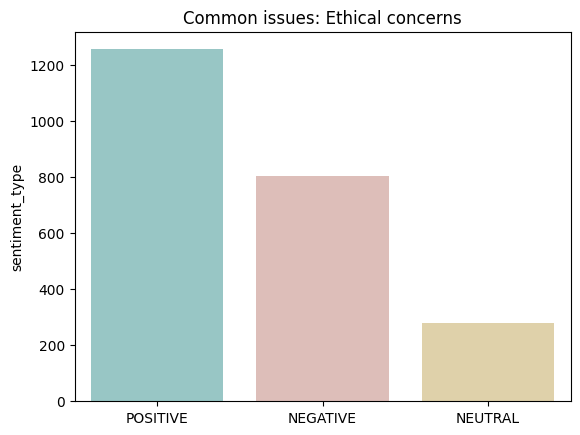

In [618]:
colors = ["#90CECC", "#E3BAB3", "#E8D5A1"]

sns.barplot(data=ethics,x=ethics['sentiment_type'].value_counts().index,y=ethics['sentiment_type'].value_counts(),palette=colors)

plt.title('Common issues: Ethical concerns', fontsize=12)



---



### **Topic Sentiment Analysis: Disinformation**



In [619]:
# Defining the list of keywords for the 'Disinformation' category. 
disinformation_keywords = ['disinformation', 'misinformation', 'libel', 'slander', 'propaganda']

# Creating a new dataframe with tweets containing the keywords. 
disinformation = df_new[df_new['final_tweet'].str.contains('|'.join(disinformation_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
disinformation.loc[disinformation.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
disinformation.loc[disinformation.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
disinformation.loc[disinformation.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

disinformation.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
500,1598129319129550851,2022-12-01 01:38:16+00:00,0,0,0,0,quick manual create misinformation campaign,0,14,86,6,quick manual create misinformation campaign,-0.0516,0.405,0.311,0.284,NEGATIVE
720,1598171249389502464,2022-12-01 04:24:53+00:00,9,0,1,0,openais really impressive definitely needs wor...,0,17,117,6,openais really impressive definitely need work...,0.6453,0.403,0.155,0.442,POSITIVE
3281,1598367219875860481,2022-12-01 17:23:36+00:00,8,0,3,0,many superinteresting screenshots cant tell on...,0,24,132,10,many superinteresting screenshots cant tell on...,-0.6597,0.671,0.329,0.000,NEGATIVE
3944,1598404509641965588,2022-12-01 19:51:46+00:00,88,4,5,0,sad see capable producing blatant misinformation,1,15,107,5,sad see capable producing blatant misinformation,-0.4215,0.273,0.491,0.236,NEGATIVE
4197,1598420493027123219,2022-12-01 20:55:17+00:00,3,0,4,0,talk timeline sbf course havent used yet nnone...,0,52,231,24,talk timeline sbf course havent used yet nnone...,-0.3182,0.901,0.099,0.000,NEGATIVE


<p>



In [620]:
#Calculating the mean sentiment for the 'Disinformation' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = disinformation.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.423288
NEUTRAL     0.000000
POSITIVE    0.435055
Name: sentiment_compound_polarity, dtype: float64


<p>



In [621]:
# Exporting the output to for data visualisation.

disinformation.to_csv('disinformation.csv', index=False)




---



### **Sentiment bar chart: Disinformation**

Text(0.5, 1.0, 'Common issues: Disinformation')

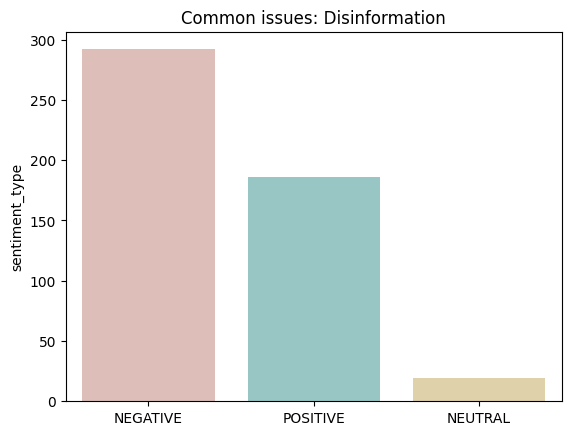

In [622]:
colors = ["#E3BAB3", "#90CECC", "#E8D5A1"]

sns.barplot(data=disinformation,x=disinformation['sentiment_type'].value_counts().index,y=disinformation['sentiment_type'].value_counts(),palette=colors)

plt.title('Common issues: Disinformation', fontsize=12)



---



### **Topic Sentiment Analysis: Abusive Language**

In [623]:
# Defining the list of keywords for the 'Abusive Language' category. 
language_keywords = ['racism', 'racist', 'misogyny', 'sexism', 'sexist', 'hate speech', 'abusive language', 'anti-semitism']

# Creating a new dataframe with tweets containing the keywords. 
abusivelang = df_new[df_new['final_tweet'].str.contains('|'.join(language_keywords))]

# Initializing the SentimentIntensityAnalyzer from NLTK.
sid = SentimentIntensityAnalyzer()

# Applying a sentiment classification to each of the keywords in the group.  
abusivelang.loc[abusivelang.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
abusivelang.loc[abusivelang.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
abusivelang.loc[abusivelang.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

abusivelang.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
4239,1598422824573698049,2022-12-01 21:04:33+00:00,0,0,0,0,ai free speech vs hate speech openai,1,10,65,1,ai free speech v hate speech openai,-0.1027,0.364,0.336,0.300,NEGATIVE
4421,1598433758612721664,2022-12-01 21:48:00+00:00,1,0,0,0,racist openai,1,6,50,2,racist openai,-0.6124,0.200,0.800,0.000,NEGATIVE
5251,1598484339767246848,2022-12-02 01:08:59+00:00,7,0,1,0,… kinda racist tbf,0,7,48,1,… kinda racist tbf,-0.5729,0.350,0.650,0.000,NEGATIVE
6754,1598572974214373376,2022-12-02 07:01:11+00:00,6,0,1,0,nobody made racist yet,0,5,27,0,nobody made racist yet,-0.6124,0.429,0.571,0.000,NEGATIVE
7464,1598610442519281664,2022-12-02 09:30:04+00:00,11,0,1,2,ai chatbot blowing peoples minds nnand hasnt g...,0,20,130,3,ai chatbot blowing people mind nnand hasnt gon...,0.4973,0.788,0.000,0.212,POSITIVE


<p>



In [624]:
#Calculating the mean sentiment for the 'Abusive Language' keyword group.

# group the rows by sentiment type and calculate the mean sentiment score for each group
mean_sentiment = abusivelang.groupby('sentiment_type')['sentiment_compound_polarity'].mean()

print(mean_sentiment)

sentiment_type
NEGATIVE   -0.59641
NEUTRAL     0.00000
POSITIVE    0.41612
Name: sentiment_compound_polarity, dtype: float64


<p>



In [625]:
# Exporting the output to for data visualisation.

abusivelang.to_csv('abusivelang.csv', index=False)




---



### **Sentiment bar chart: Abusive Language**

Text(0.5, 1.0, 'Common issues: Abusive Language')

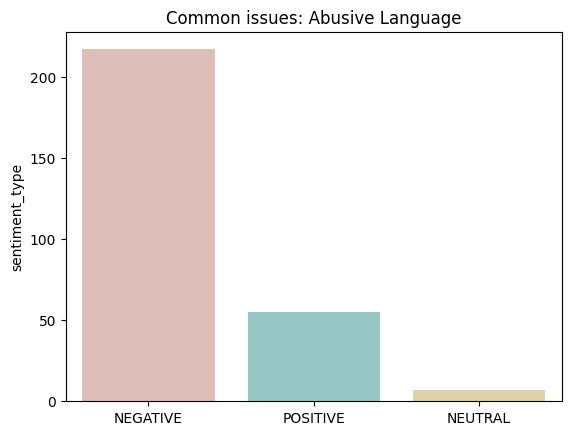

In [626]:
colors = ["#E3BAB3", "#90CECC", "#E8D5A1"]

sns.barplot(data=abusivelang,x=abusivelang['sentiment_type'].value_counts().index,y=abusivelang['sentiment_type'].value_counts(),palette=colors)

plt.title('Common issues: Abusive Language', fontsize=12)



---



### **Topline Engagement Metrics: Calculations for visualisation**

In [627]:
#Calculating the total like count
df_new.like_count.sum()

3690153

In [628]:
#Calculating the total quote count
df_new.quote_count.sum()

88431

In [629]:
#Calculating the total reply count
df_new.reply_count.sum()

269822

In [630]:
#Calculating the total retweet count
df_new.retweet_count.sum()

503658



---

